In [1]:
import json
import os
import pandas as pd
import requests
import bs4
from lxml import html

In [2]:
def get_yelp_data(path):
    with open(path, 'r') as file:
        raw_data = file.readlines()
    raw_data = map(lambda x: x.rstrip(), raw_data)
    json_data = '[' + ','.join(raw_data) + ']'
    df = pd.read_json(json_data)
    return df

In [3]:
file_type = 'business'
#'checkin' : 'yelp_academic_dataset_checkin.json',
#'review' : 'yelp_academic_dataset_review.json', # the file size is 6.3G 
#'tip' : 'yelp_academic_dataset_tip.json',
#'user' : 'yelp_academic_dataset_user.json' # the file size is 3.3G 

path = os.path.join('..', '..', 'yelp_dataset', 'yelp_academic_dataset_' + file_type + '.json')
df = get_yelp_data(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [5]:
df.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
7,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'..."
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."


In [20]:
os.environ['no_proxy'] = '*' 
session = requests.Session()
session.trust_env = False

important_columns = ['name', 'address', 'city', 'state', 'postal_code']

session = requests.Session()
session.trust_env = False

for i, entry in df.iterrows():
    if i == 10: break
    biz_info = ''
    for col in important_columns:
        if entry[col]:
            if len(biz_info) > 0: biz_info += '+'
            biz_info += entry[col].strip()
            
    params = (
        ('q', biz_info),
        ('search_engine', 'google.com'),
    )

    res = session.get('https://www.google.com/search', params=params)
    idx = res.text.find('Website</div>')
    url = 'None'
    if idx >= 0:
        while idx >= 0 and res.text[idx - 6: idx - 1] != 'href=' and res.text[idx - 5: idx - 1] != 'url=':
            idx -= 1
        if idx == -1: break
        while res.text[idx - 2] != '/' or res.text[idx - 1] != '/': 
            idx += 1
        url = res.text[idx: res.text.find('/', idx)]
    print(i, url)

0 www.therangeatlakenorman.com
1 None
2 www.felinus.ca
3 None
4 www.usemyguyservices.com
5 oasisautocenter.net
6 None
7 www.junctiontire.net
8 www.theempanadashousechampaign.com
9 None


In [7]:
from google import google

<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Junction Tire &amp; Auto Service 6910 E Southern Ave Mesa AZ - Google Search</title><script nonce="HjavONrbc+p9ZT27cw2ALA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.fl
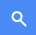
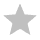
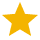
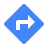

In [13]:

res = requests.get('https://www.google.com/search', params=params)

print(res.text)